In [1]:
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

### Load the data from the experiments

In [2]:
folder = Path("storage/synced")

# load all csv files in the folder using pandas
df = pd.concat([pd.read_csv(f) for f in folder.glob("*.csv")])
df["stride_series"].replace(np.NaN, False, inplace=True)
df['train_exc_limit'].replace(np.NaN, 0, inplace=True)
df["pretrained"].replace(np.NaN, False, inplace=True)
df["pretrain_mode"].replace(np.NaN, False, inplace=True)
df["window_time_stride"].replace(np.NaN, 1, inplace=True)
df["window_patt_stride"].replace(np.NaN, 1, inplace=True)
df["cv_rep"].replace(np.NaN, False, inplace=True)
df["eq_wdw_length"] = df["window_length"]*df["window_time_stride"]
df

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2,eq_wdw_length
0,df,res,ArrowHead,0.25,120.0,128.0,False,10,5.0,1.0,...,200.0,384.0,384.0,57.764508,63649.372312,63707.136821,False,NaN,NaN,50.0
1,df,res,ArrowHead,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,384.0,108.095236,76209.146873,76317.242109,False,NaN,NaN,70.0
2,df,res,ArrowHead,0.25,120.0,128.0,False,10,3.0,1.0,...,200.0,384.0,384.0,83.412101,165764.187401,165847.599502,False,NaN,NaN,30.0
3,df,res,ArrowHead,0.25,120.0,128.0,False,10,7.0,1.0,...,48.0,48.0,384.0,111.395006,7567.075226,7678.470232,False,NaN,NaN,70.0
4,df,res,ArrowHead,0.25,120.0,128.0,False,10,7.0,1.0,...,48.0,48.0,384.0,69.439453,10990.281148,11059.720601,False,NaN,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,df,cnn,Trace,0.25,60.0,128.0,True,10,7.0,1.0,...,NaN,NaN,NaN,90.236432,69768.488772,69858.725204,False,0.172529,-1.186222,70.0
0,df,cnn,Trace,0.25,120.0,128.0,False,10,3.0,1.0,...,200.0,256.0,256.0,35.041957,10484.065224,10519.107181,False,NaN,NaN,30.0
1,df,cnn,Trace,0.25,120.0,128.0,False,10,1.0,1.0,...,200.0,256.0,256.0,42.328713,13468.669775,13510.998488,False,NaN,NaN,10.0
2,df,cnn,Trace,0.25,120.0,128.0,False,10,5.0,1.0,...,200.0,256.0,256.0,65.790667,14507.956828,14573.747495,False,NaN,NaN,50.0


In [3]:
df[df["arch"] == "nn"][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,cv_rep
0,ts,nn,GunPoint,False,150,False,1.0,1.0,32.0,False,0.0
0,ts,nn,ECG200,False,96,False,1.0,1.0,32.0,False,2.0
0,ts,nn,GunPoint,False,150,False,1.0,1.0,32.0,False,4.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,0.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,3.0
0,ts,nn,GunPoint,False,150,False,1.0,1.0,32.0,False,3.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,4.0
0,ts,nn,ArrowHead,False,251,False,1.0,1.0,32.0,False,4.0
0,ts,nn,Trace,False,275,False,1.0,1.0,32.0,False,0.0
0,ts,nn,ArrowHead,False,251,False,1.0,1.0,32.0,False,1.0


In [4]:
# check for duplicate entries
file_entries = len(df)
df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).first().reset_index()
unique_entries = len(df)
print(f"{file_entries - unique_entries} duplicate entries removed")
# df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
#                  'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).count()
# df[df["eq_wdw_length"] > 1]

0 duplicate entries removed


In [5]:
# show pretrained encoders
df[df["pretrain_mode"]==True][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', 'window_time_stride', 'window_patt_stride', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,window_time_stride,window_patt_stride,pretrained,cv_rep
75,df,cnn,ArrowHead,True,10,7.0,1.0,False,0.0
76,df,cnn,ArrowHead,True,10,7.0,1.0,False,0.0
152,df,cnn,CBF,True,10,7.0,1.0,False,0.0
153,df,cnn,CBF,True,10,7.0,1.0,False,0.0
229,df,cnn,ECG200,True,10,7.0,1.0,False,0.0
230,df,cnn,ECG200,True,10,7.0,1.0,False,0.0
306,df,cnn,GunPoint,True,10,7.0,1.0,False,0.0
307,df,cnn,GunPoint,True,10,7.0,1.0,False,0.0
308,df,cnn,Plane,True,10,7.0,1.0,False,0.0
309,df,cnn,Plane,True,10,7.0,1.0,False,0.0


In [6]:
df[np.logical_and(df["stride_series"]==False, df["pretrain_mode"]==False)]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length
0,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,68.982387,30569.601099,30638.583486,NaN,NaN,10.0
1,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,83.244409,31746.921849,31830.166258,NaN,NaN,10.0
2,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,71.123601,35739.750665,35810.874266,NaN,NaN,10.0
3,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,100.135603,37059.353541,37159.489144,NaN,NaN,10.0
4,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,57.307215,17048.680783,17105.987998,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,ts,tcn,CBF,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,23.388743,12478.981234,12502.369977,NaN,NaN,70.0
2175,ts,tcn,CBF,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,27.034485,15178.733847,15205.768332,NaN,NaN,70.0
2176,ts,tcn,CBF,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,25.091887,15393.328066,15418.419953,NaN,NaN,70.0
2177,ts,tcn,CBF,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,24.354080,13228.289756,13252.643836,NaN,NaN,70.0


In [7]:
cols = ['test_acc', 'test_f1', 'test_auroc', 'val_acc', 'val_f1', 'val_auroc']
df.columns

Index(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length',
       'stride_series', 'window_time_stride', 'window_patt_stride',
       'train_exc_limit', 'pretrained', 'cv_rep', 'val_size', 'max_epochs',
       'batch_size', 'learning_rate', 'random_state', 'nepochs', 'best_model',
       'total_params', 'trainable_params', 'metrics_csv', 'val_acc', 'val_f1',
       'val_auroc', 'test_acc', 'test_f1', 'test_auroc', 'exc',
       'train_strat_size', 'train_event_mult', 'nevents_test',
       'nevents_train_lim', 'nevents_train_tot', 'time_dm', 'time_train',
       'time_total', 'val_mse', 'val_r2', 'eq_wdw_length'],
      dtype='object')

# Time Dilation Effects

- Check the dependence of time dilation on classifier performance

In [8]:
# Filter the data
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_patt_stride"] == 1]
data = data[data["pretrained"] == False]

nn_data = data[data["arch"] == "nn"]
data = data[~data["arch"].isin(["nn"])]
#data = data[data["dataset"] == "CBF"]


In [9]:
# Generate a table
data.groupby(["dataset", "mode", "arch", "eq_wdw_length"])[cols].mean()

test_acc   test_f1  test_auroc   val_acc  \
dataset   mode arch eq_wdw_length                                             
ArrowHead df   cnn  10.0           0.465034  0.465034    0.140383  0.474362   
                    30.0           0.488553  0.488553    0.145909  0.490153   
                    50.0           0.497533  0.497533    0.146922  0.491226   
                    70.0           0.530858  0.530858    0.155448  0.540327   
               res  10.0           0.411352  0.411352    0.127754  0.415847   
...                                     ...       ...         ...       ...   
Trace     ts   res  70.0           0.596643  0.596643    0.117853  0.635059   
               rnn  10.0           0.516878  0.516878    0.118383  0.535421   
                    30.0           0.535043  0.535043    0.118072  0.555946   
                    50.0           0.553448  0.553448    0.116965  0.582271   
                    70.0           0.531295  0.531295    0.120869  0.583608   

                                     val_f1  val_auroc  
dataset   mode arch eq_wdw_length                       
ArrowHead df   cnn  10.0           0.474362   0.173685  
                    30.0           0.490153   0.177595  
                    50.0           0.491226   0.174644  
                    70.0           0.540327   0.182987  
               res  10.0           0.415847   0.157831  
...                                     ...        ...  
Trace     ts   res  70.0           0.635059   0.151840  
               rnn  10.0           0.535421   0.140444  
                    30.0           0.555946   0.147099  
                    50.0           0.582271   0.147046  
                    70.0           0.583608   0.138338  

[180 rows x 6 columns]

In [10]:
nn_data.groupby(["dataset", "mode", "arch"])[cols].mean()

,,,test_acc,test_f1,test_auroc,val_acc,val_f1,val_auroc
dataset,mode,arch,,,,,,
ArrowHead,ts,nn,0.331657,0.331657,NaN,NaN,NaN,NaN
ECG200,ts,nn,0.373543,0.373543,NaN,NaN,NaN,NaN
GunPoint,ts,nn,0.510791,0.510791,NaN,NaN,NaN,NaN
SyntheticControl,ts,nn,0.270676,0.270676,NaN,NaN,NaN,NaN
Trace,ts,nn,0.718083,0.718083,NaN,NaN,NaN,NaN


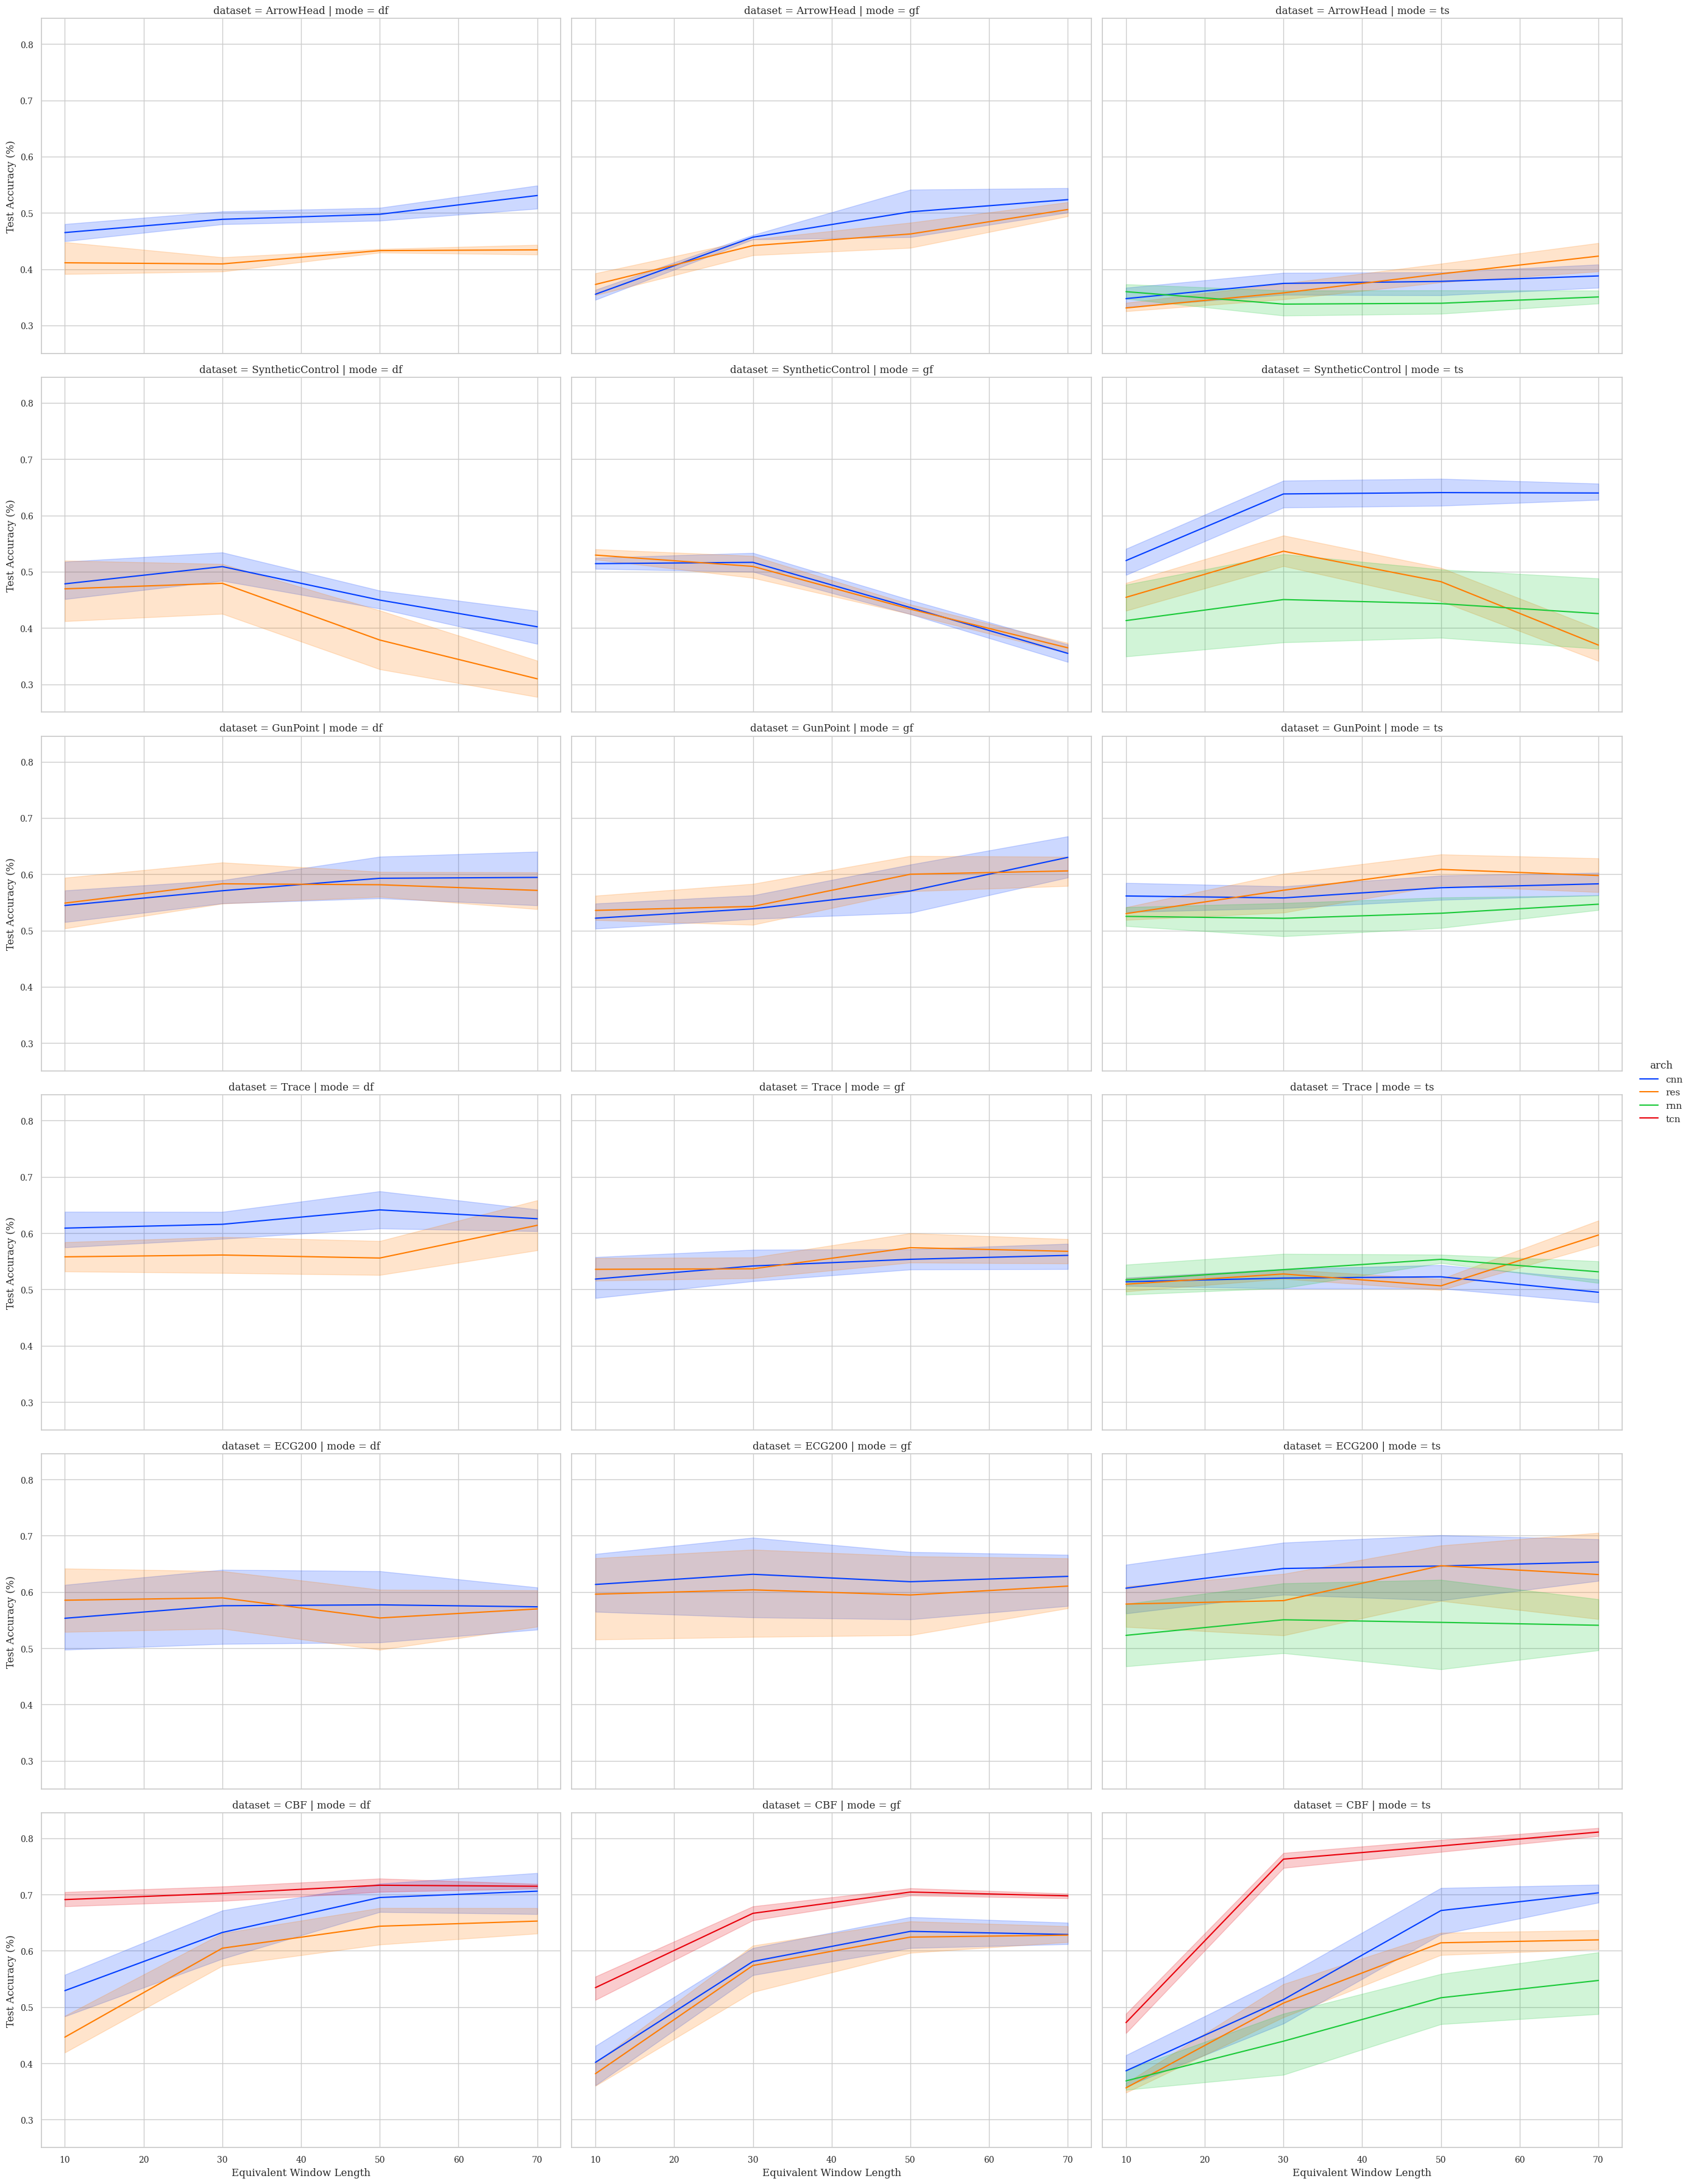

In [11]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="eq_wdw_length", y="test_acc", hue='arch', kind="line", palette="bright", col="mode", row="dataset",
                height=6, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Equivalent Window Length");

g.savefig("figures/time_dilation.pdf", bbox_inches='tight')

# Self-Supervised Pretrain Effects

In [12]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data["window_time_stride"] == 7]
data = data[data["window_patt_stride"] == 1]

# data = data[data["dataset"] == "CBF"]
# data = data[data["mode"] == "df"]
data = data[data["arch"].isin(["cnn", "res"])]

In [13]:
data[data["mode"] == "df"].groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean()

test_acc  \
dataset          mode arch pretrained stride_series train_exc_limit             
ArrowHead        df   cnn  False      False         4.0              0.365050   
                                                    8.0              0.409149   
                                                    16.0             0.463108   
                                                    32.0             0.530858   
                           True       False         4.0              0.428705   
...                                                                       ...   
SyntheticControl df   res  True       True          8.0              0.294524   
                                                    16.0             0.380250   
                                                    32.0             0.465538   
Trace            df   cnn  False      False         32.0             0.625560   
                      res  False      False         32.0             0.613913   

                                                                      test_f1  \
dataset          mode arch pretrained stride_series train_exc_limit             
ArrowHead        df   cnn  False      False         4.0              0.365050   
                                                    8.0              0.409149   
                                                    16.0             0.463108   
                                                    32.0             0.530858   
                           True       False         4.0              0.428705   
...                                                                       ...   
SyntheticControl df   res  True       True          8.0              0.294524   
                                                    16.0             0.380250   
                                                    32.0             0.465538   
Trace            df   cnn  False      False         32.0             0.625560   
                      res  False      False         32.0             0.613913   

                                                                     test_auroc  \
dataset          mode arch pretrained stride_series train_exc_limit               
ArrowHead        df   cnn  False      False         4.0                0.136130   
                                                    8.0                0.126026   
                                                    16.0               0.143588   
                                                    32.0               0.155448   
                           True       False         4.0                0.146202   
...                                                                         ...   
SyntheticControl df   res  True       True          8.0                0.277317   
                                                    16.0               0.301433   
                                                    32.0               0.315165   
Trace            df   cnn  False      False         32.0               0.150910   
                      res  False      False         32.0               0.133416   

                                                                      val_acc  \
dataset          mode arch pretrained stride_series train_exc_limit             
ArrowHead        df   cnn  False      False         4.0              0.426253   
                                                    8.0              0.421179   
                                                    16.0             0.487165   
                                                    32.0             0.540327   
                           True       False         4.0              0.587241   
...                                                                       ...   
SyntheticControl df   res  True       True          8.0              0.313417   
                                                    16.0             0.387217   
                                                    32.0             0.

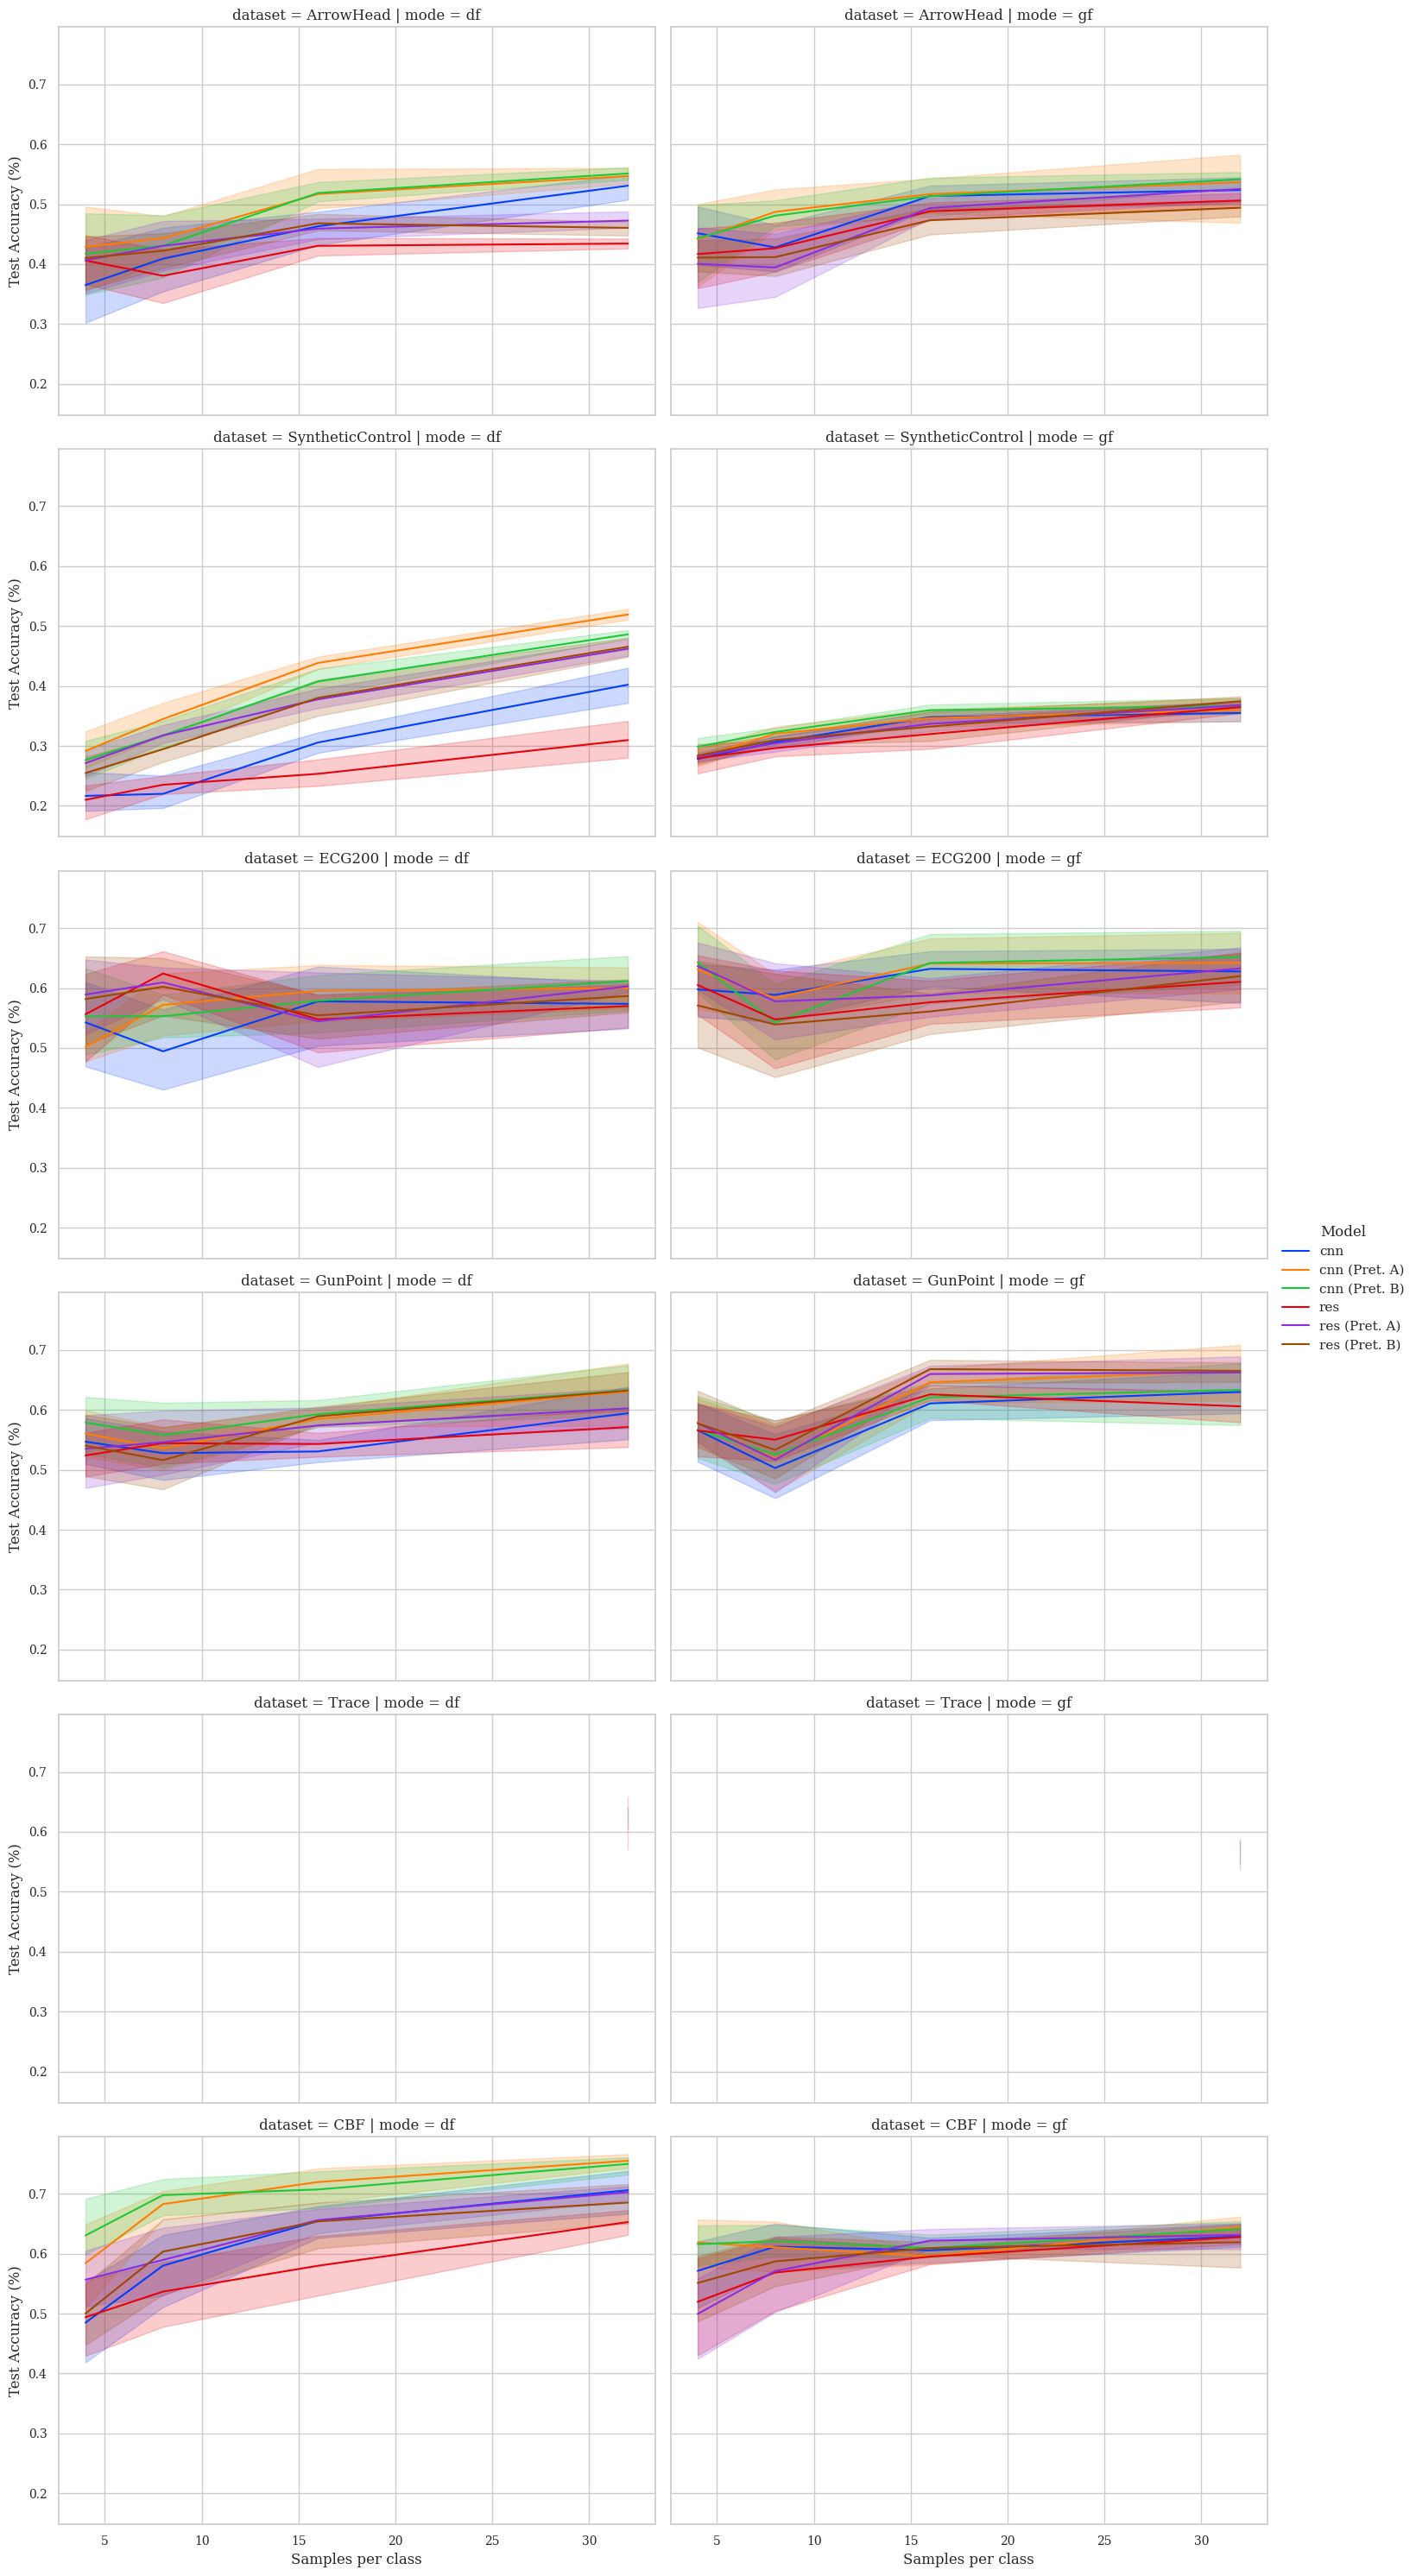

In [14]:
# Generate a plot
data["Model"] = data["arch"] + " " + data["pretrained"].replace({True: "(Pret. ", False: ""}) + data["stride_series"].replace({True: "B)", False: "A)"})
data["Model"].replace({"cnn A)": "cnn", "res A)": "res", "tcn A)": "tcn"}, inplace=True)
data.sort_values(['Model'], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="train_exc_limit", y="test_acc", hue='Model', kind="line", palette="bright", col="mode", row="dataset", 
                height=5, aspect=1.5, legend=True, facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Samples per class");

g.savefig("figures/pretrain.pdf", bbox_inches='tight')

# heatmap showing percent change over no pretraied model

In [15]:
dfg = data.groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean().reset_index()

metric = "test_acc"

# archs = {arch: i for i, arch in enumerate(dfg["arch"].sort_values().unique())}
# dsets = {dset: i for i, dset in enumerate(dfg["dataset"].sort_values().unique())}
# modes = {mode: i for i, mode in enumerate(dfg["mode"].sort_values().unique())}
# samps = {samp: i for i, samp in enumerate(dfg["train_exc_limit"].sort_values().unique())}
# prets = {"A": 0, "B": 1}

dfd = pd.DataFrame(columns=["arch", "mode", "dataset", "train_exc_limit", "pret", metric])

for (dset, mode, arch, nsamp), g in dfg.groupby(["dataset", "mode", "arch", 'train_exc_limit']):
    
    g: pd.DataFrame

    if len(g) == 3:

        def_val = g[metric].iloc[0]
        pa_val = g[metric].iloc[1]
        pb_val = g[metric].iloc[2]

        dfd.loc[len(dfd)] = [arch, mode, dset, nsamp, "A", (pa_val - def_val)*100]
        dfd.loc[len(dfd)] = [arch, mode, dset, nsamp, "B", (pb_val - def_val)*100]
        
    else: 
        continue

dfd["arch_pret"] = dfd["arch"] + "_" + dfd["pret"]
dfd.sort_values(["arch_pret", "dataset", "train_exc_limit"], inplace=True)

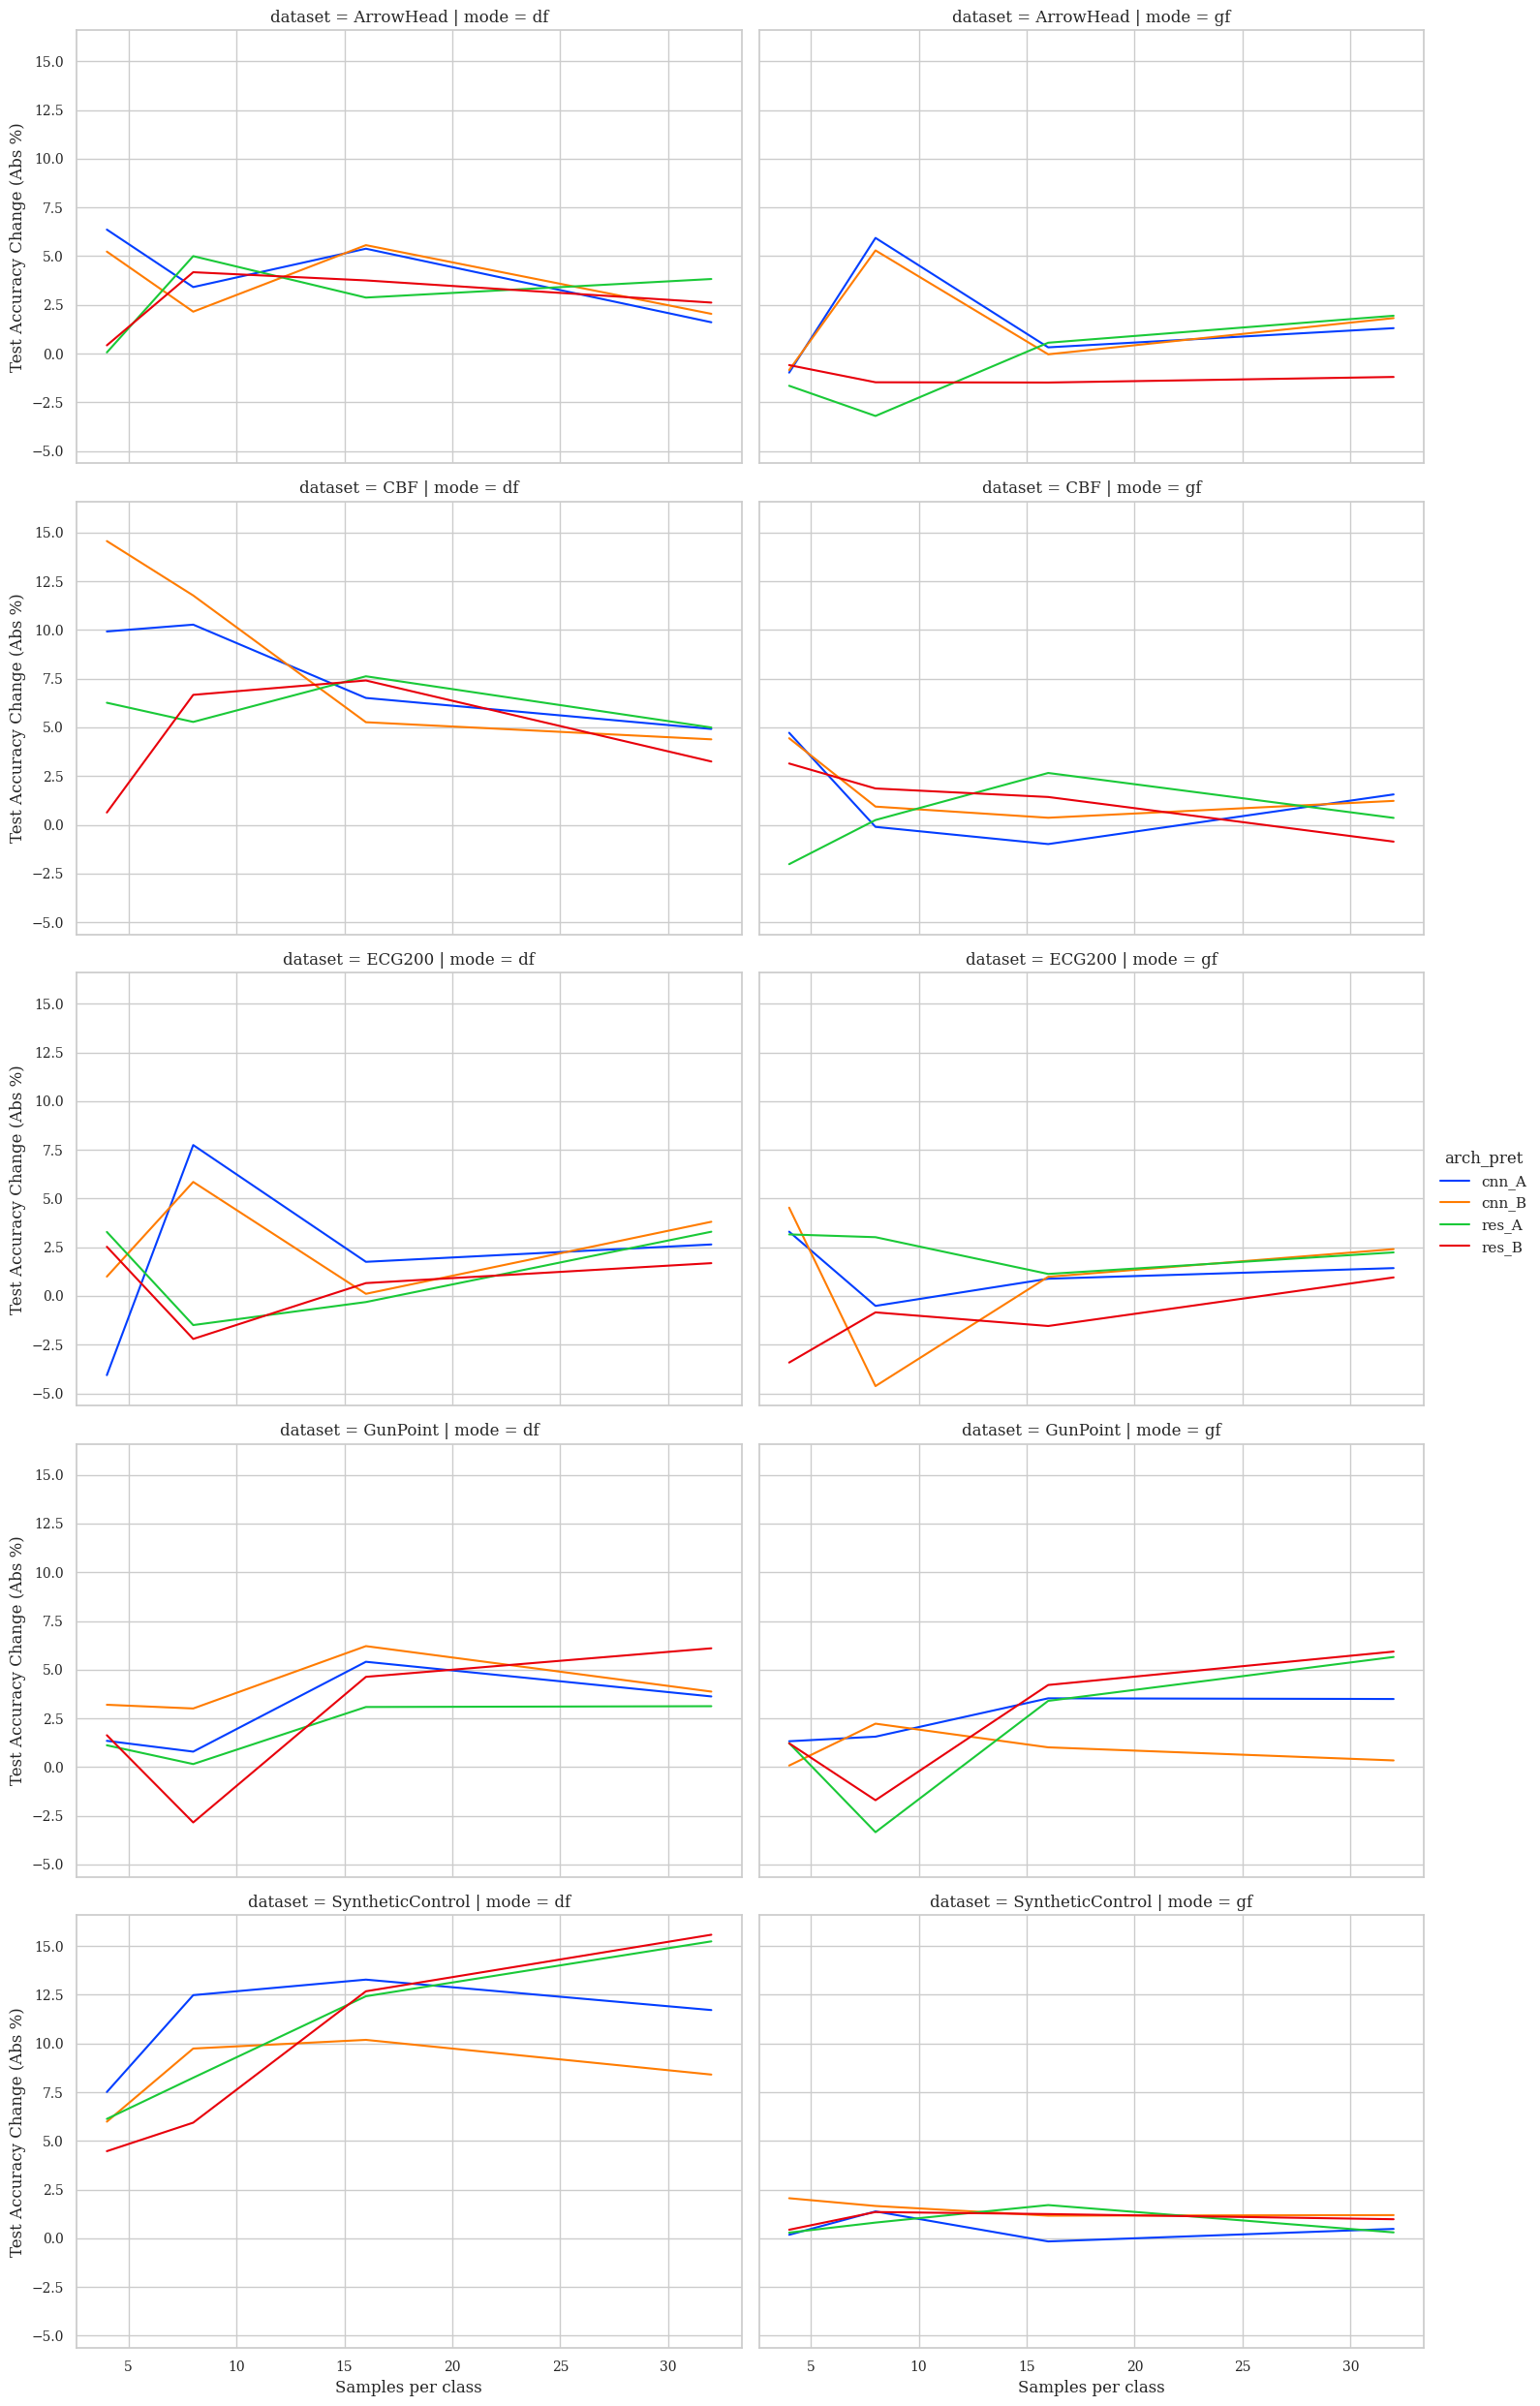

In [24]:
sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=dfd, x="train_exc_limit", y=metric, hue='arch_pret', kind="line", palette="bright", col="mode", row="dataset", 
            height=5, aspect=1.5, legend=True, facet_kws={"despine": False})

g.set_ylabels("Test Accuracy Change (Abs %)")
g.set_xlabels("Samples per class");

g.savefig("figures/pret_change.pdf", bbox_inches='tight')


# DF vs GF figure

In [18]:
from s3ts.data.acquisition import download_dataset
from s3ts.data.setup import train_test_splits
from s3ts.data.setup import setup_train_dm 
from pathlib import Path

# dataset settings
dataset         = "SyntheticControl"
storage_dir     = Path("storage")
cv_rep          = 0
exc             = 32
random_state    = 0
rho_dfs         = 0.1

X, Y, medoids, medoid_idx = download_dataset(dataset=dataset, storage_dir=storage_dir)
for j, (train_idx, test_idx) in enumerate(train_test_splits(X, Y, exc=exc, nreps=cv_rep+1, random_state=random_state)):
            if j == cv_rep:
                break

print(X.shape)

# sts settings
train_strat_size = 2
train_event_mult = 4
test_sts_length = 200
train_event_limit = exc
batch_size = 128

dm_df = setup_train_dm(X=X, Y=Y, patterns=medoids, train_idx=train_idx, test_idx=test_idx,
    test_sts_length=200, train_event_mult=4, train_strat_size=2, train_event_limit=exc,
    batch_size=128, val_size=0.25, rho_dfs=rho_dfs, window_length=10, mode="df", num_workers=4,
    window_time_stride=7, window_patt_stride=1,stride_series=False, random_state=random_state)

dm_gf = setup_train_dm(X=X, Y=Y, patterns=medoids, train_idx=train_idx, test_idx=test_idx,
    test_sts_length=200, train_event_mult=4, train_strat_size=2, train_event_limit=exc,
    batch_size=128, val_size=0.25, rho_dfs=rho_dfs, window_length=10, mode="gf", num_workers=4,
    window_time_stride=7, window_patt_stride=1,stride_series=False, random_state=random_state)

(600, 60)


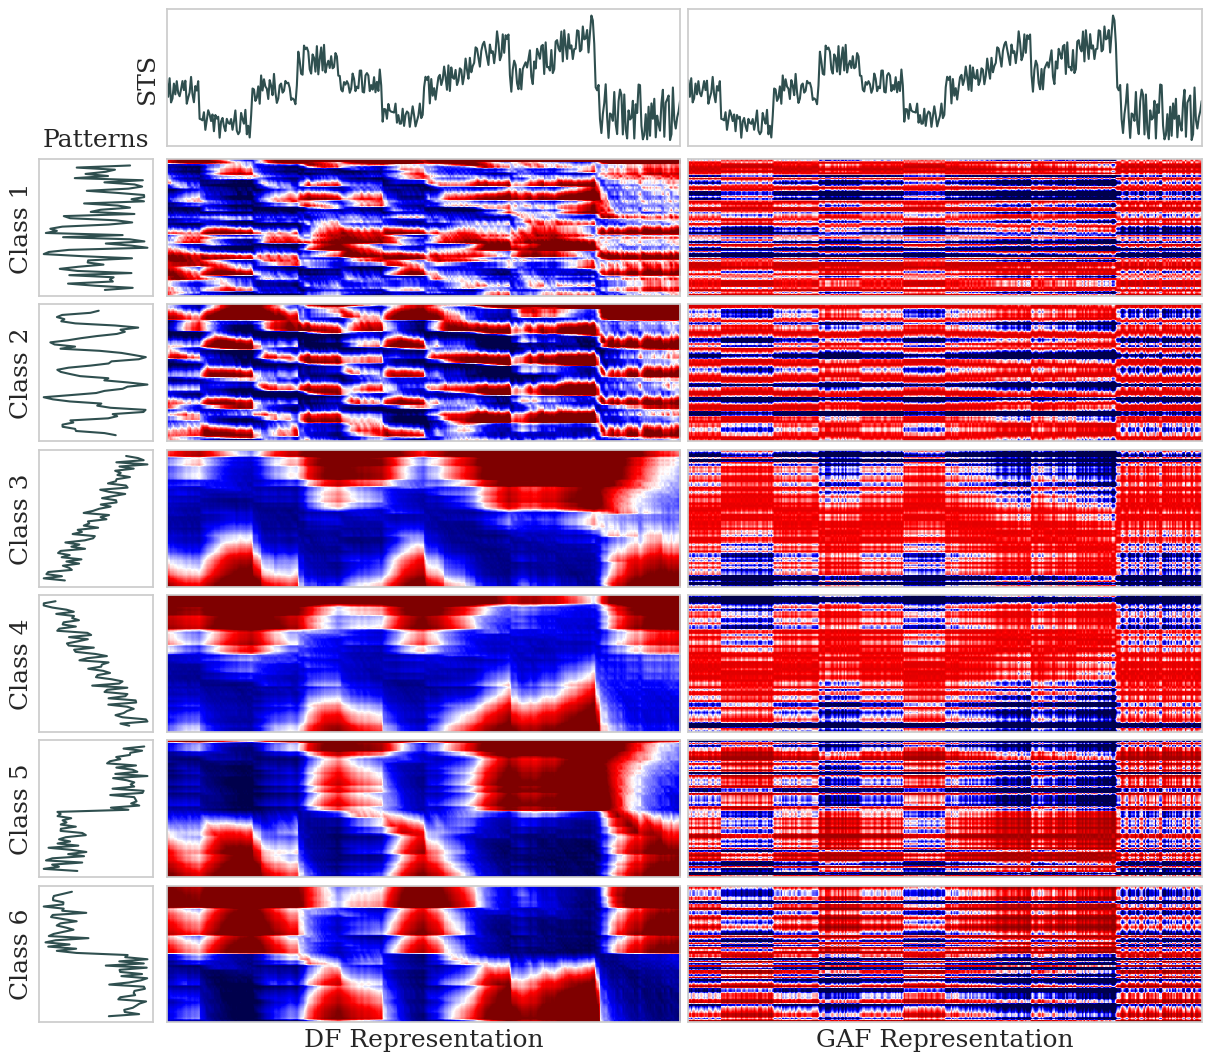

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# plot settings
shift, n_frames = 0, 6
vmin, vmax = -2.5, 2.5
print_lines = False
fontsize = 18
ts_color = "darkslategray"
cmaps = ["seismic", "seismic"]

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')


n_patterns = dm_df.n_patterns
sts_range = (dm_df.l_events*shift, dm_df.l_events*shift + dm_df.l_events*n_frames)

patts = dm_df.patterns.numpy()
TS = dm_df.STS_train[sts_range[0]:sts_range[1]]
DF = dm_df.DM_train[:,:,sts_range[0]:sts_range[1]]
GF = dm_gf.DM_train[:,:,sts_range[0]:sts_range[1]]

fig = plt.figure(figsize=(12, 1.5+n_patterns*1.5), dpi=100, layout="constrained")
gs = fig.add_gridspec(nrows=n_patterns+1, ncols=3,
        hspace=0, height_ratios=None,
        wspace=0, width_ratios=[0.1, 0.45, 0.45])


vlines = np.where(np.mod(np.arange(sts_range[0], sts_range[1]), dm_df.l_events) == 0)[0]

corner = fig.add_subplot(gs[0,0])
corner.set_xticklabels([]), corner.set_yticklabels([])
corner.set_xticks([]), corner.set_yticks([])
corner.text(0.95, 0.5, "STS", fontsize=fontsize, rotation=90, ha="center", va="center")
corner.text(0.5, 0.05, "Patterns", fontsize=fontsize, ha="center", va="center")
corner.spines['top'].set_visible(False)
corner.spines['right'].set_visible(False)
corner.spines['bottom'].set_visible(False)
corner.spines['left'].set_visible(False)


sts_ax1 = fig.add_subplot(gs[0,1])
sts_ax1.plot(np.arange(sts_range[0], sts_range[1]), TS, color=ts_color)
sts_ax1.set_xlim(sts_range[0], sts_range[1]-1)
sts_ax1.set_xticklabels([]), sts_ax1.set_yticklabels([])
sts_ax1.set_xticks([]), sts_ax1.set_yticks([])
if print_lines:
        [sts_ax1.axvline(x + sts_range[0], color="dimgray", linewidth=0.5) for x in vlines]
sts_ax1.grid(True)


sts_ax2 = fig.add_subplot(gs[0,2])
sts_ax2.plot(np.arange(sts_range[0], sts_range[1]), TS, color=ts_color)
sts_ax2.set_xlim(sts_range[0], sts_range[1]-1)
sts_ax2.set_xticklabels([]), sts_ax2.set_yticklabels([])
sts_ax2.set_xticks([]), sts_ax2.set_yticks([])
if print_lines:
        [sts_ax2.axvline(x + sts_range[0], color="dimgray", linewidth=0.5) for x in vlines]
sts_ax1.grid(True)


for p in range(n_patterns):

        # patt plot
        patt_ax = fig.add_subplot(gs[p+1,0])
        patt_ax.plot(patts[p,::-1], np.arange(len(patts[0])), color=ts_color)
        patt_ax.set_yticklabels([]), patt_ax.set_xticklabels([])
        patt_ax.set_yticks([]), patt_ax.set_xticks([])
        patt_ax.invert_xaxis(), patt_ax.grid(True)

        # # image plot
        # im_ax = fig.add_subplot(gs[p+1,1])     
        # gf = GF[p,:,sts_range[0]:sts_range[1]-(sts_range[1]-sts_range[0])//2]   
        # df = DF[p,:,sts_range[1]-(sts_range[1]-sts_range[0])//2:sts_range[1]]
        # gf = 2*(gf-gf.mean())/gf.std()
        # df = 2*(df-df.mean())/df.std()
        # im = np.concatenate([gf, df], axis=1)
        # im_ax.imshow(im, aspect="auto", cmap="seismic", vmin=-2, vmax=2)
        # im_ax.set_yticklabels([]), im_ax.set_xticklabels([])
        # im_ax.set_xticks([]), im_ax.set_yticks([])
        
        #[im_ax.axvline(x, color="white") for x in vlines]

        # df plot
        df_ax = fig.add_subplot(gs[p+1,1])        
        df_im = DF[p,:,sts_range[0]:sts_range[1]]
        df_im = 2*(df_im-df_im.mean())/df_im.std()
        df_ax.imshow(df_im, aspect="auto", cmap=cmaps[0], vmin=vmin, vmax=vmax)
        df_ax.set_yticklabels([]), df_ax.set_xticklabels([])
        df_ax.set_xticks([]), df_ax.set_yticks([])
        #df_vlines = np.where(np.mod(np.arange(sts_range[0], sts_range[1]-(sts_range[1]-sts_range[0])//2), dm_df.l_events) == 0)[0]
        #[df_ax.axvline(x, color="dimgray") for x in df_vlines]

        # gf plot
        gf_ax = fig.add_subplot(gs[p+1,2])
        gf_im = GF[p,:,sts_range[0]:sts_range[1]]
        gf_im = 2*(gf_im-gf_im.mean())/gf_im.std()
        gf_ax.imshow(gf_im, aspect="auto", cmap=cmaps[1], vmin=vmin, vmax=vmax)
        gf_ax.set_yticklabels([]), gf_ax.set_xticklabels([])
        gf_ax.set_xticks([]), gf_ax.set_yticks([])
        #gf_vlines = np.where(np.mod(np.arange(sts_range[1]-(sts_range[1]-sts_range[0])//2, sts_range[1]), dm_df.l_events) == 0)[0]
        #[gf_ax.axvline(x, color="dimgray") for x in gf_vlines]

        patt_ax.set_ylabel("Class {}".format(p+1), fontsize=fontsize)

        if p == n_patterns-1:
                df_ax.set_xlabel("DF Representation", fontsize=fontsize)
                gf_ax.set_xlabel("GAF Representation", fontsize=fontsize)

plt.savefig(f"figures/df_gf_{dataset}.pdf", bbox_inches="tight")